#### Vidya Praveen
#### Final Project - Predicting Customer Churn in a Telecommunications

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv("..\\data\\raw\\telecom_customer_churn.csv")

In [3]:
df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [5]:
df1 = df.copy()

In [6]:
df1.head(7)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.4,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.7,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN


In [7]:
df1.drop(['Customer ID','Total Refunds','Zip Code','Latitude', 'Longitude','Churn Category', 'Churn Reason'],axis='columns',inplace=True)

In [8]:
df1.shape

(7043, 31)

In [9]:
df1.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract  

In [10]:
features = df1.columns
for feature in features:
     print(f'{feature}--->{df[feature].nunique()}')

Gender--->2
Age--->62
Married--->2
Number of Dependents--->10
City--->1106
Number of Referrals--->12
Tenure in Months--->72
Offer--->6
Phone Service--->2
Avg Monthly Long Distance Charges--->3583
Multiple Lines--->2
Internet Service--->2
Internet Type--->3
Avg Monthly GB Download--->49
Online Security--->2
Online Backup--->2
Device Protection Plan--->2
Premium Tech Support--->2
Streaming TV--->2
Streaming Movies--->2
Streaming Music--->2
Unlimited Data--->2
Contract--->3
Paperless Billing--->2
Payment Method--->3
Monthly Charge--->1591
Total Charges--->6540
Total Extra Data Charges--->16
Total Long Distance Charges--->6068
Total Revenue--->6975
Customer Status--->3


In [11]:
df1.isnull().sum() / df1.shape[0]

Gender                               0.000000
Age                                  0.000000
Married                              0.000000
Number of Dependents                 0.000000
City                                 0.000000
Number of Referrals                  0.000000
Tenure in Months                     0.000000
Offer                                0.000000
Phone Service                        0.000000
Avg Monthly Long Distance Charges    0.096834
Multiple Lines                       0.096834
Internet Service                     0.000000
Internet Type                        0.216669
Avg Monthly GB Download              0.216669
Online Security                      0.216669
Online Backup                        0.216669
Device Protection Plan               0.216669
Premium Tech Support                 0.216669
Streaming TV                         0.216669
Streaming Movies                     0.216669
Streaming Music                      0.216669
Unlimited Data                    

In [12]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [13]:
df1=df1.interpolate()

In [14]:
df1=df1.dropna()
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [15]:
df['Unlimited Data']

0       Yes
1        No
2       Yes
3       Yes
4       Yes
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042    Yes
Name: Unlimited Data, Length: 7043, dtype: object

In [16]:
number_columns=['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

In [17]:
def unique_values_names(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')

In [18]:
unique_values_names(df1)

Gender:['Female' 'Male']
Married:['Yes' 'No']
City:['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Blairsden Graeagle'
 'Lost Hills' 'Windsor']
Offer:['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service:['Yes']
Multiple Lines:['No' 'Yes']
Internet Service:['Yes']
Internet Type:['Cable' 'Fiber Optic' 'DSL']
Online Security:['No' 'Yes']
Online Backup:['Yes' 'No']
Device Protection Plan:['No' 'Yes']
Premium Tech Support:['Yes' 'No']
Streaming TV:['Yes' 'No']
Streaming Movies:['No' 'Yes']
Streaming Music:['No' 'Yes']
Unlimited Data:['Yes' 'No']
Contract:['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing:['Yes' 'No']
Payment Method:['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer Status:['Stayed' 'Churned' 'Joined']


In [19]:
import plotly.express as px 

In [20]:
import matplotlib.pyplot as plt

In [21]:
fig = px.histogram(df1, x = 'Age')
fig.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of Dependents'}>,
        <Axes: title={'center': 'Number of Referrals'}>],
       [<Axes: title={'center': 'Tenure in Months'}>,
        <Axes: title={'center': 'Avg Monthly Long Distance Charges'}>,
        <Axes: title={'center': 'Avg Monthly GB Download'}>],
       [<Axes: title={'center': 'Monthly Charge'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Extra Data Charges'}>],
       [<Axes: title={'center': 'Total Long Distance Charges'}>,
        <Axes: title={'center': 'Total Revenue'}>, <Axes: >]],
      dtype=object)

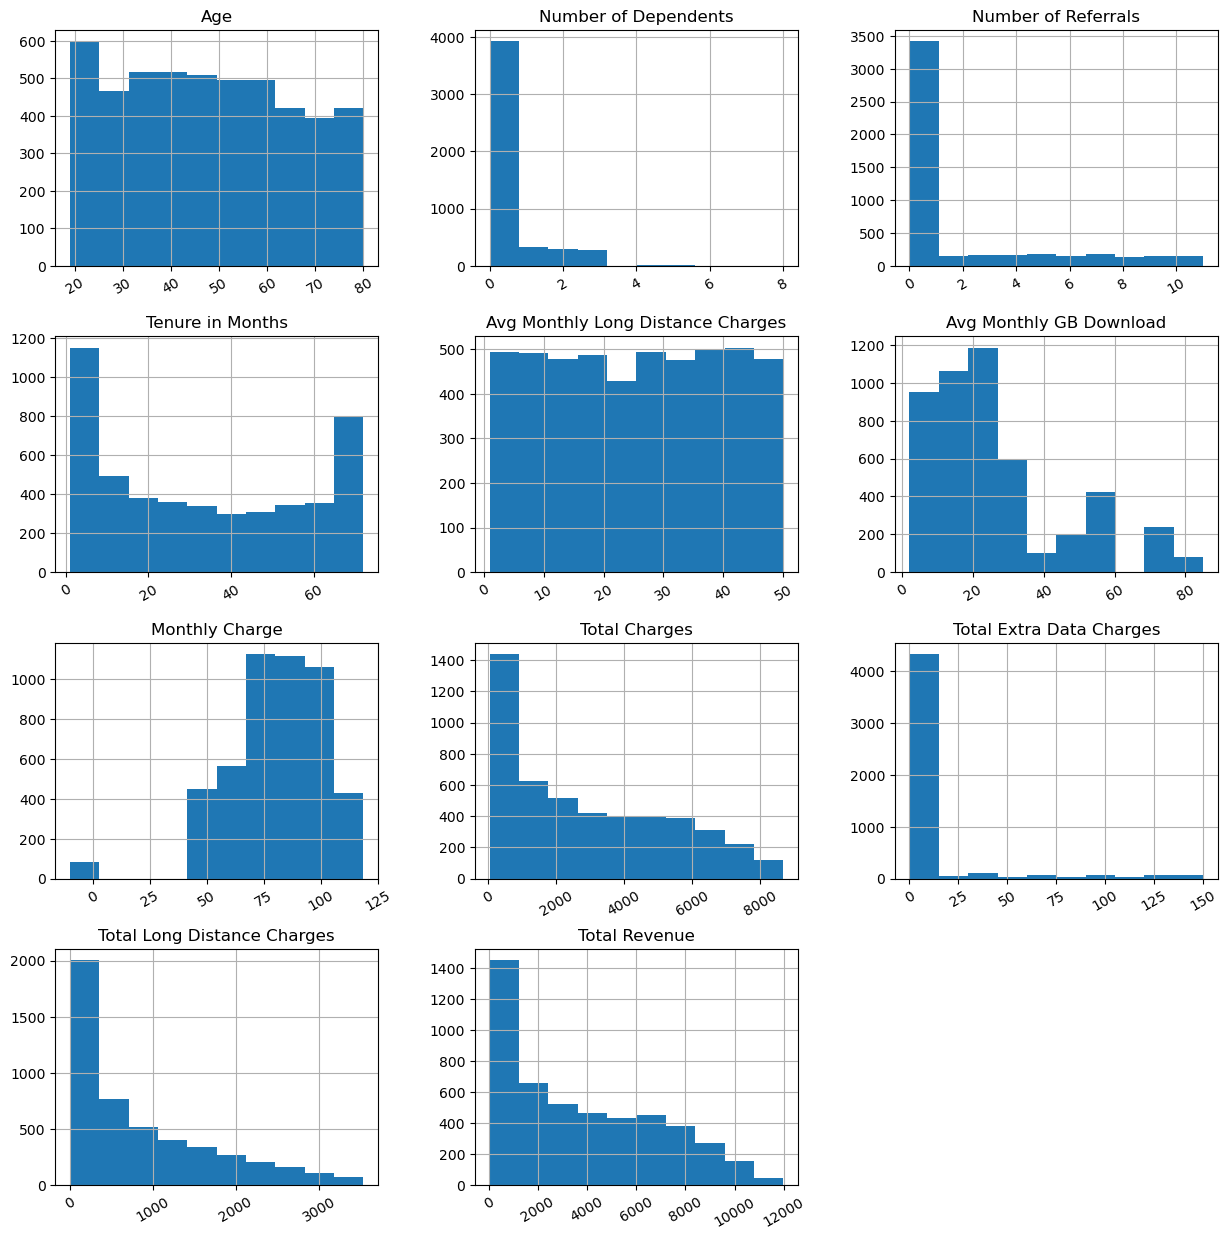

In [22]:
df1.hist(figsize=(15,15), xrot=30)

In [23]:
df1['Age']

0       37
1       46
2       50
3       78
4       75
        ..
7036    53
7038    20
7039    40
7040    22
7041    21
Name: Age, Length: 4835, dtype: int64

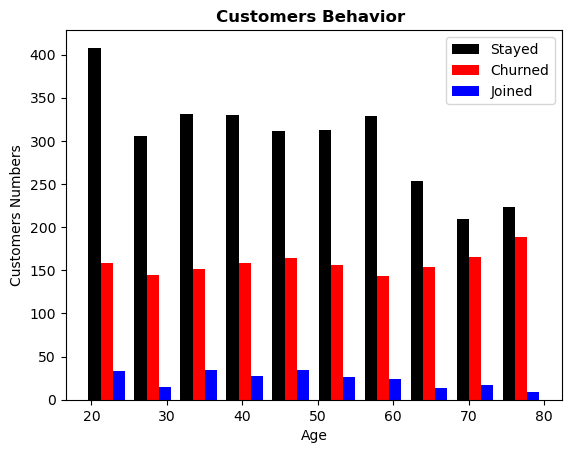

In [24]:
Customer_Stayed=df1[df1['Customer Status']=='Stayed'].Age
Customer_Churned=df1[df1['Customer Status']=='Churned'].Age
Customer_Joined=df1[df1['Customer Status']=='Joined'].Age

plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['black','red','blue'],label=['Stayed','Churned','Joined'])

plt.title('Customers Behavior ',fontweight ="bold")
plt.legend()

In [25]:
import seaborn as sns

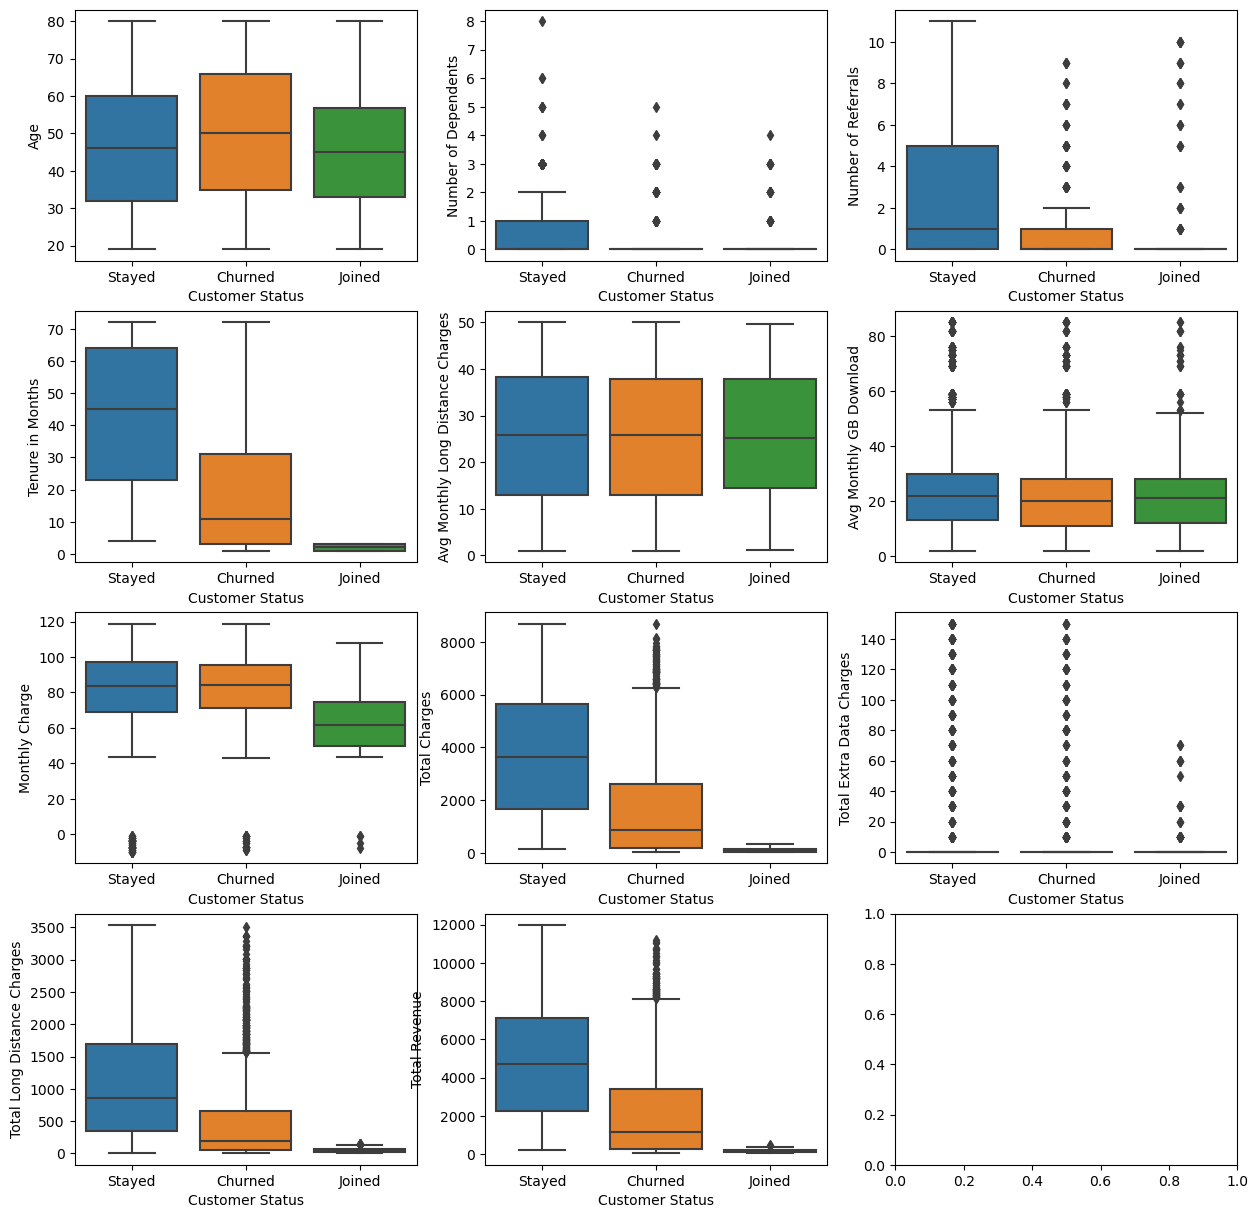

In [26]:
fig, ax = plt.subplots(4,3, figsize = (15,15))
for i, subplot in zip(number_columns, ax.flatten()):
    sns.boxplot(x = 'Customer Status', y = i , data = df1, ax = subplot)

In [27]:
fig = px.density_heatmap(df1, x='Age', y='Total Charges')
fig.show()

In [28]:
df1.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

<Axes: xlabel='Customer Status'>

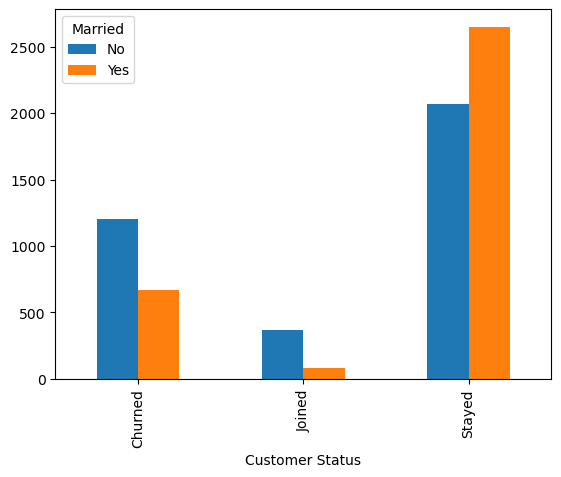

In [29]:
pd.crosstab(df['Customer Status'], df['Married']).plot(kind='bar')

<Axes: xlabel='Customer Status'>

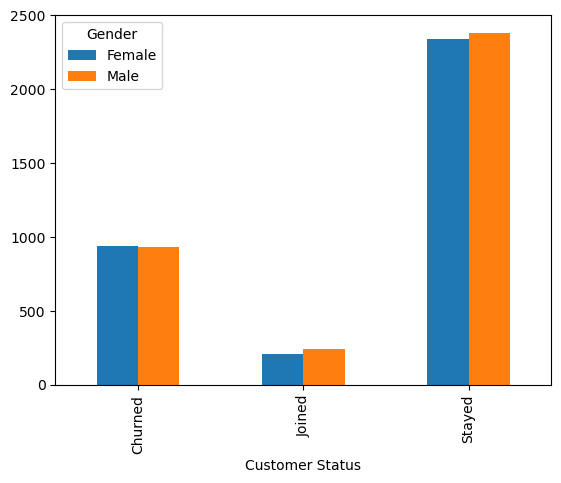

In [30]:
pd.crosstab(df['Customer Status'], df['Gender']).plot(kind='bar')

In [31]:
df1['Payment Method'].unique()

array(['Credit Card', 'Bank Withdrawal', 'Mailed Check'], dtype=object)

In [32]:
Roles = {}
for j in df1['Payment Method'].unique():
    Roles[j] = df1[df1['Payment Method'] == j]

In [33]:
Roles.keys()

dict_keys(['Credit Card', 'Bank Withdrawal', 'Mailed Check'])

In [34]:
Roles['Credit Card']

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,...,Yes,One Year,Yes,Credit Card,65.60,593.30,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,0,9,None,Yes,10.69,...,No,Month-to-Month,No,Credit Card,-4.00,542.40,10,96.21,610.28,Stayed
4,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,...,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0,22.14,289.54,Churned
5,Female,23,No,3,Midpines,0,9,Offer E,Yes,16.77,...,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0,150.93,722.38,Stayed
7,Male,52,Yes,0,Napa,8,63,Offer B,Yes,12.96,...,No,Two Year,Yes,Credit Card,84.65,5377.80,20,816.48,6214.28,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,Female,20,No,0,Los Angeles,0,7,Offer E,Yes,36.49,...,Yes,One Year,Yes,Credit Card,94.05,633.45,0,255.43,888.88,Stayed
7036,Female,53,No,0,Hume,0,1,Offer E,Yes,42.09,...,Yes,Month-to-Month,Yes,Credit Card,70.15,70.15,0,42.09,112.24,Churned
7038,Female,20,No,0,La Mesa,0,13,Offer D,Yes,46.68,...,Yes,One Year,No,Credit Card,55.15,742.90,0,606.84,1349.74,Stayed
7040,Male,22,No,0,Elk,0,2,Offer E,Yes,18.62,...,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0,37.24,129.99,Joined


In [35]:
len(Roles)

3

In [36]:
off = df1['Offer'].value_counts()
off

None       2641
Offer B     585
Offer E     544
Offer D     392
Offer A     382
Offer C     291
Name: Offer, dtype: int64

In [37]:
import plotly.graph_objects as go

In [38]:
fig = go.Figure([go.Bar(x=off.index, y=off.values)])
fig.show()

In [39]:
df1_off = Roles['Credit Card'].Offer.value_counts()
df1_off

None       842
Offer B    204
Offer A    171
Offer E    126
Offer D    119
Offer C     96
Name: Offer, dtype: int64

In [40]:
fig = go.Figure([go.Bar(x= df1_off.index, y=df1_off.values)])
fig.show()

In [41]:
df1 = df1.rename(columns = {'Customer Status':'Customer_Status'})

In [42]:
Roles1 = {}
for k in df1['Customer_Status'].unique():
    Roles1[k] = df1[df1['Customer_Status'] == k]
Roles1.keys()

dict_keys(['Stayed', 'Churned', 'Joined'])

In [43]:
df1_state = Roles1['Stayed'].Offer.value_counts()
df1_state

None       1601
Offer B     497
Offer A     348
Offer D     250
Offer C     204
Offer E     115
Name: Offer, dtype: int64

#### model development

In [44]:
df1.replace({"Gender":{'Female':0,'Male':1}},inplace=True)

In [45]:
yes_and_no=[  'Paperless Billing', 'Unlimited Data', 
       'Streaming Movies', 'Streaming Music',  'Streaming TV',
       'Premium Tech Support', 'Device Protection Plan', 'Online Backup', 'Online Security',
       'Multiple Lines',  'Married']
for i in yes_and_no:
    df1.replace({'No':0,'Yes':1},inplace=True)

In [46]:
df1.replace({"Phone Service":{'Yes':1}},inplace=True)

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.Customer_Status = le.fit_transform(df1.Customer_Status)

In [48]:
df1 = pd.get_dummies(data=df1, columns=['Payment Method','Contract','Internet Type','Offer','City'])

In [49]:
cols_to_scale = ['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [50]:
X = df1.drop('Customer_Status',axis='columns')
y = df1['Customer_Status']

In [51]:
X.head(5)

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia
0,0,0.295082,1,0.0,0.181818,0.112676,1,0.844835,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.442623,0,0.0,0.000000,0.112676,1,0.197632,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0.508197,0,0.0,0.000000,0.042254,1,0.666394,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.967213,1,0.0,0.090909,0.169014,1,0.547366,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.918033,1,0.0,0.272727,0.028169,1,0.130053,0,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y.head(5)

0    2
1    2
2    0
3    0
4    0
Name: Customer_Status, dtype: int32

#### Split the dataset into training and testing sets

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=5)

In [54]:
len(X_train)

3868

In [55]:
X_train[:10]

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia
1931,1,0.983607,1,0.000,0.363636,0.718310,1,0.574520,1,1,...,0,0,0,0,0,0,0,0,0,0
1244,1,0.147541,1,0.000,0.090909,0.690141,1,0.676399,1,1,...,0,0,0,0,0,0,0,0,0,0
3167,1,0.475410,1,0.250,0.090909,0.098592,1,0.117803,0,1,...,0,0,0,0,0,0,0,0,0,0
5573,1,0.983607,1,0.000,0.727273,0.169014,1,0.962434,1,1,...,0,0,0,0,0,0,0,0,0,0
2741,0,0.852459,0,0.000,0.000000,0.619718,1,0.238056,1,1,...,0,0,0,0,0,0,0,0,0,0
1184,1,0.377049,1,0.375,0.727273,0.774648,1,0.813597,1,1,...,0,0,0,0,0,0,0,0,0,0
4120,1,0.803279,1,0.000,0.363636,0.859155,1,0.076562,1,1,...,0,0,0,0,0,0,0,0,0,0
373,1,0.114754,0,0.000,0.000000,0.802817,1,0.948550,0,1,...,0,0,0,0,0,0,0,0,0,0
1499,1,0.606557,0,0.000,0.000000,0.084507,1,0.683544,0,1,...,0,0,0,0,0,0,0,0,0,0
6702,0,0.327869,0,0.000,0.000000,0.887324,1,0.553695,1,1,...,0,0,0,0,0,0,0,0,0,0


#### Importing Models

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [57]:
model_params = {
     
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }    
    },
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5]
            
        }
    },   
}

In [58]:
from sklearn.model_selection import ShuffleSplit

In [59]:
from sklearn.model_selection import GridSearchCV
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.789866,{'n_estimators': 10}
1,logistic_regression,0.783040,{'C': 5}
2,naive_bayes_gaussian,0.367735,{}
3,decision_tree,0.775181,{'criterion': 'gini'}
4,XGB_Classifier,0.819235,{'base_score': 0.5}


#### Model Evaluation

In [60]:
reg=XGBClassifier()
reg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [61]:
reg.score(X_test, y_test)

0.8138572905894519

#### Interpretation and Recommendations

In [62]:
y_predicted = reg.predict(X_test)
y_predicted[:5]

array([2, 2, 0, 2, 0], dtype=int64)

In [63]:
y_test[:5]

3076    2
2931    2
3814    0
5052    2
2128    0
Name: Customer_Status, dtype: int32

Text(95.72222222222221, 0.5, 'Truth')

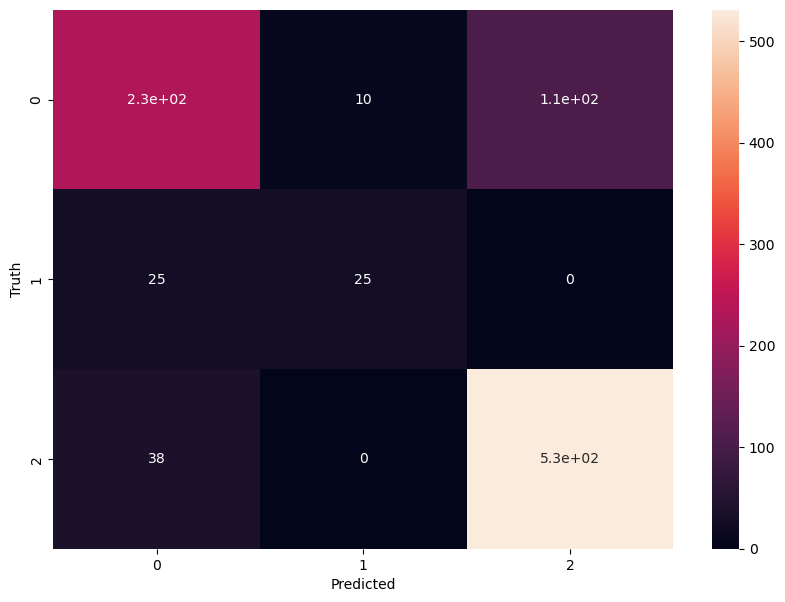

In [64]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       348
           1       0.71      0.50      0.59        50
           2       0.83      0.93      0.88       569

    accuracy                           0.81       967
   macro avg       0.78      0.70      0.73       967
weighted avg       0.81      0.81      0.81       967



In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.8138572905894519